In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wklay_df = pd.read_csv('wklay_total_value_tx_no.csv')
wklay_df.head()

,wallet_address,total_wklay_sent,total_wklay_received,min_date,max_date,total_wklay_tx
0,0x24a527c76a58ea3bc1b1b21148be62a7a6e97762,53806.0,65187.0,2022-01-17 11:45:02,2022-07-09 18:13:46,235
1,0x3b7fa5006c2a5bc74db4965f1cfa01a6d18c460d,463.0,8398.0,2022-04-02 03:46:43,2022-09-25 16:35:19,77
2,0x74df21d98b8812fe9b5f78c889e604b60ac19b73,3037.0,15459.0,2022-01-13 14:03:59,2022-09-23 00:54:14,121
3,0x2a8a0363ab0cfd56e36e0bfeb2e1ea11606a4971,31372.0,35489.0,2022-02-14 13:08:47,2022-05-03 09:56:42,140
4,0xd7c16d81c31d806edd6a8788f8cef15796e2d3d2,9478.0,25320.0,2022-01-14 23:48:30,2022-05-22 11:24:26,56


In [3]:
wklay_df['min_date'] = pd.to_datetime(wklay_df['min_date'])
wklay_df['max_date'] = pd.to_datetime(wklay_df['max_date'])

In [4]:
wklay_df['active_duration'] = wklay_df['max_date'] - wklay_df['min_date']
wklay_df['active_seconds'] = wklay_df['active_duration'].apply(lambda x: x.seconds)
wklay_df['freq'] = wklay_df['active_seconds'] /wklay_df['total_wklay_tx']
wklay_df.head()

,wallet_address,total_wklay_sent,total_wklay_received,min_date,max_date,total_wklay_tx,active_duration,active_seconds,freq
0,0x24a527c76a58ea3bc1b1b21148be62a7a6e97762,53806.0,65187.0,2022-01-17 11:45:02,2022-07-09 18:13:46,235,173 days 06:28:44,23324,99.251064
1,0x3b7fa5006c2a5bc74db4965f1cfa01a6d18c460d,463.0,8398.0,2022-04-02 03:46:43,2022-09-25 16:35:19,77,176 days 12:48:36,46116,598.909091
2,0x74df21d98b8812fe9b5f78c889e604b60ac19b73,3037.0,15459.0,2022-01-13 14:03:59,2022-09-23 00:54:14,121,252 days 10:50:15,39015,322.438017
3,0x2a8a0363ab0cfd56e36e0bfeb2e1ea11606a4971,31372.0,35489.0,2022-02-14 13:08:47,2022-05-03 09:56:42,140,77 days 20:47:55,74875,534.821429
4,0xd7c16d81c31d806edd6a8788f8cef15796e2d3d2,9478.0,25320.0,2022-01-14 23:48:30,2022-05-22 11:24:26,56,127 days 11:35:56,41756,745.642857


In [5]:
wklay_clean = wklay_df[['wallet_address','total_wklay_sent','total_wklay_received','active_seconds','freq']].copy()
wklay_clean.rename(columns ={'active_seconds': 'wklay_act_second','freq':'wklay_freq'}, inplace = True)
wklay_clean.head()

,wallet_address,total_wklay_sent,total_wklay_received,wklay_act_second,wklay_freq
0,0x24a527c76a58ea3bc1b1b21148be62a7a6e97762,53806.0,65187.0,23324,99.251064
1,0x3b7fa5006c2a5bc74db4965f1cfa01a6d18c460d,463.0,8398.0,46116,598.909091
2,0x74df21d98b8812fe9b5f78c889e604b60ac19b73,3037.0,15459.0,39015,322.438017
3,0x2a8a0363ab0cfd56e36e0bfeb2e1ea11606a4971,31372.0,35489.0,74875,534.821429
4,0xd7c16d81c31d806edd6a8788f8cef15796e2d3d2,9478.0,25320.0,41756,745.642857


In [6]:
ousdt_df = pd.read_csv('ousdt_total_value_tx_no.csv')
ousdt_df.head()

,wallet_address,total_ousdt_sent,total_ousdt_received,min_date,max_date,total_ousdt_tx
0,0xd412cc36970bcc46c3751cfac4d6b03b583bbe33,3956.0,3956.0,2022-01-01 03:00:49,2022-12-15 15:00:44,2416
1,0xf50782a24afcb26acb85d086cf892bfffb5731b5,308744635.0,308745060.0,2022-01-20 12:36:10,2022-12-16 07:57:13,265760
2,0x6393e943ebef0efee0ac92e2d441d562fa6345a4,459511.0,459511.0,2022-01-20 12:01:56,2022-12-16 06:26:03,78800
3,0x124d18d1d66e804e22d349787490e773d334dd9e,505066.0,504094.0,2022-01-07 05:42:30,2022-05-11 05:33:24,51
4,0xa4f26b1b8d03ce3cf9e3331da70544e577f6c781,15098.0,15096.0,2022-08-02 10:15:29,2022-09-12 01:52:08,249


In [7]:
ousdc_df = pd.read_csv('ousdc_total_value_tx_no.csv')
ousdc_df.head()

,wallet_address,total_ousdc_sent,total_ousdc_received,min_date,max_date,total_ousdc_tx
0,0xf6ad9107a965ac61342fdf416b420444adbd2e17,50996085.0,50996085.0,2022-02-19 17:54:04,2022-12-16 07:17:12,109252
1,0x5745ae4887295f787859c0a6afd0dd569b6f906b,57.0,57.0,2022-06-09 02:30:22,2022-12-12 08:36:41,8
2,0xa694f0baae07e579a079e0f2d598d71293f331c2,12362279.0,12362279.0,2022-01-20 12:55:24,2022-02-11 12:54:00,9866
3,0xd26316c90a1798b6685be094cc5dd6049d61a904,214187.0,214187.0,2022-02-12 01:54:07,2022-12-09 13:05:38,98
4,0xe890163abd1b53486dab3db07fc230e403efbb8e,524842.0,524827.0,2022-05-12 07:05:38,2022-12-04 14:10:44,170


In [8]:
usd_merge = ousdt_df.merge(ousdc_df, how ='outer', on = 'wallet_address', suffixes=("_usdc", "_usdt"))
usd_merge.head()

,wallet_address,total_ousdt_sent,total_ousdt_received,min_date_usdc,max_date_usdc,total_ousdt_tx,total_ousdc_sent,total_ousdc_received,min_date_usdt,max_date_usdt,total_ousdc_tx
0,0xd412cc36970bcc46c3751cfac4d6b03b583bbe33,3956.0,3956.0,2022-01-01 03:00:49,2022-12-15 15:00:44,2416.0,NaN,NaN,NaN,NaN,NaN
1,0xf50782a24afcb26acb85d086cf892bfffb5731b5,308744635.0,308745060.0,2022-01-20 12:36:10,2022-12-16 07:57:13,265760.0,NaN,NaN,NaN,NaN,NaN
2,0x6393e943ebef0efee0ac92e2d441d562fa6345a4,459511.0,459511.0,2022-01-20 12:01:56,2022-12-16 06:26:03,78800.0,NaN,NaN,NaN,NaN,NaN
3,0x124d18d1d66e804e22d349787490e773d334dd9e,505066.0,504094.0,2022-01-07 05:42:30,2022-05-11 05:33:24,51.0,NaN,NaN,NaN,NaN,NaN
4,0xa4f26b1b8d03ce3cf9e3331da70544e577f6c781,15098.0,15096.0,2022-08-02 10:15:29,2022-09-12 01:52:08,249.0,NaN,NaN,NaN,NaN,NaN


In [9]:
usd_merge.fillna({'total_ousdt_sent':0,'total_ousdt_received':0,'total_ousdt_tx':0,'total_ousdc_sent':0,'total_ousdc_received':0,'total_ousdc_tx':0}, inplace = True)

In [10]:
usd_merge

,wallet_address,total_ousdt_sent,total_ousdt_received,min_date_usdc,max_date_usdc,total_ousdt_tx,total_ousdc_sent,total_ousdc_received,min_date_usdt,max_date_usdt,total_ousdc_tx
0,0xd412cc36970bcc46c3751cfac4d6b03b583bbe33,3956.0,3956.0,2022-01-01 03:00:49,2022-12-15 15:00:44,2416.0,0.0,0.0,NaN,NaN,0.0
1,0xf50782a24afcb26acb85d086cf892bfffb5731b5,308744635.0,308745060.0,2022-01-20 12:36:10,2022-12-16 07:57:13,265760.0,0.0,0.0,NaN,NaN,0.0
2,0x6393e943ebef0efee0ac92e2d441d562fa6345a4,459511.0,459511.0,2022-01-20 12:01:56,2022-12-16 06:26:03,78800.0,0.0,0.0,NaN,NaN,0.0
3,0x124d18d1d66e804e22d349787490e773d334dd9e,505066.0,504094.0,2022-01-07 05:42:30,2022-05-11 05:33:24,51.0,0.0,0.0,NaN,NaN,0.0
4,0xa4f26b1b8d03ce3cf9e3331da70544e577f6c781,15098.0,15096.0,2022-08-02 10:15:29,2022-09-12 01:52:08,249.0,0.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18830,0x09692ef8f20baf546b3a413a3d1b483616b72446,0.0,0.0,NaN,NaN,0.0,999.0,999.0,2022-08-13 06:29:04,2022-08-13 06:29:04,2.0
18831,0x9e716bdf748c8c1dc0f885fc454394d645dfdd88,0.0,0.0,NaN,NaN,0.0,2.0,2.0,2022-02-19 12:55:43,2022-02-19 12:56:53,3.0
18832,0x0c19301fee09d1c7df23facdc225eaa39f4b92f4,0.0,0.0,NaN,NaN,0.0,989.0,989.0,2022-06-29 10:01:18,2022-06-29 10:28:42,4.0
18833,0xabe3e80edb3b33a1d6032ce426545270d9e0fde0,0.0,0.0,NaN,NaN,0.0,7.0,7.0,2022-06-19 06:37:47,2022-06-19 06:37:47,2.0


In [11]:
usd_merge['usd_sent'] = usd_merge['total_ousdt_sent'] + usd_merge['total_ousdc_sent']
usd_merge['usd_received'] = usd_merge['total_ousdt_received'] + usd_merge['total_ousdc_received']
usd_merge['usd_tx_sum'] = usd_merge['total_ousdt_tx'] + usd_merge['total_ousdc_tx']
usd_merge.head()

,wallet_address,total_ousdt_sent,total_ousdt_received,min_date_usdc,max_date_usdc,total_ousdt_tx,total_ousdc_sent,total_ousdc_received,min_date_usdt,max_date_usdt,total_ousdc_tx,usd_sent,usd_received,usd_tx_sum
0,0xd412cc36970bcc46c3751cfac4d6b03b583bbe33,3956.0,3956.0,2022-01-01 03:00:49,2022-12-15 15:00:44,2416.0,0.0,0.0,NaN,NaN,0.0,3956.0,3956.0,2416.0
1,0xf50782a24afcb26acb85d086cf892bfffb5731b5,308744635.0,308745060.0,2022-01-20 12:36:10,2022-12-16 07:57:13,265760.0,0.0,0.0,NaN,NaN,0.0,308744635.0,308745060.0,265760.0
2,0x6393e943ebef0efee0ac92e2d441d562fa6345a4,459511.0,459511.0,2022-01-20 12:01:56,2022-12-16 06:26:03,78800.0,0.0,0.0,NaN,NaN,0.0,459511.0,459511.0,78800.0
3,0x124d18d1d66e804e22d349787490e773d334dd9e,505066.0,504094.0,2022-01-07 05:42:30,2022-05-11 05:33:24,51.0,0.0,0.0,NaN,NaN,0.0,505066.0,504094.0,51.0
4,0xa4f26b1b8d03ce3cf9e3331da70544e577f6c781,15098.0,15096.0,2022-08-02 10:15:29,2022-09-12 01:52:08,249.0,0.0,0.0,NaN,NaN,0.0,15098.0,15096.0,249.0


In [12]:
usd_merge['min_date_usdc'] = pd.to_datetime(usd_merge['min_date_usdc'])
usd_merge['min_date_usdt'] = pd.to_datetime(usd_merge['min_date_usdt'])
usd_merge['max_date_usdc'] = pd.to_datetime(usd_merge['max_date_usdc'])
usd_merge['max_date_usdt'] = pd.to_datetime(usd_merge['max_date_usdt'])

In [13]:
usd_merge['min_date'] = ""
usd_merge['min_date'] =  usd_merge[['min_date_usdc','min_date_usdt']].min(axis=1)
usd_merge['max_date'] = ""
usd_merge['max_date'] =  usd_merge[['max_date_usdc','max_date_usdt']].min(axis=1)
usd_merge.head()

,wallet_address,total_ousdt_sent,total_ousdt_received,min_date_usdc,max_date_usdc,total_ousdt_tx,total_ousdc_sent,total_ousdc_received,min_date_usdt,max_date_usdt,total_ousdc_tx,usd_sent,usd_received,usd_tx_sum,min_date,max_date
0,0xd412cc36970bcc46c3751cfac4d6b03b583bbe33,3956.0,3956.0,2022-01-01 03:00:49,2022-12-15 15:00:44,2416.0,0.0,0.0,NaT,NaT,0.0,3956.0,3956.0,2416.0,2022-01-01 03:00:49,2022-12-15 15:00:44
1,0xf50782a24afcb26acb85d086cf892bfffb5731b5,308744635.0,308745060.0,2022-01-20 12:36:10,2022-12-16 07:57:13,265760.0,0.0,0.0,NaT,NaT,0.0,308744635.0,308745060.0,265760.0,2022-01-20 12:36:10,2022-12-16 07:57:13
2,0x6393e943ebef0efee0ac92e2d441d562fa6345a4,459511.0,459511.0,2022-01-20 12:01:56,2022-12-16 06:26:03,78800.0,0.0,0.0,NaT,NaT,0.0,459511.0,459511.0,78800.0,2022-01-20 12:01:56,2022-12-16 06:26:03
3,0x124d18d1d66e804e22d349787490e773d334dd9e,505066.0,504094.0,2022-01-07 05:42:30,2022-05-11 05:33:24,51.0,0.0,0.0,NaT,NaT,0.0,505066.0,504094.0,51.0,2022-01-07 05:42:30,2022-05-11 05:33:24
4,0xa4f26b1b8d03ce3cf9e3331da70544e577f6c781,15098.0,15096.0,2022-08-02 10:15:29,2022-09-12 01:52:08,249.0,0.0,0.0,NaT,NaT,0.0,15098.0,15096.0,249.0,2022-08-02 10:15:29,2022-09-12 01:52:08


In [14]:
usd_merge['usd_active_duration'] = usd_merge['max_date'] - usd_merge['min_date']
usd_merge['usd_active_seconds'] = usd_merge['usd_active_duration'].apply(lambda x: x.seconds)
usd_merge['usd_freq'] = usd_merge['usd_active_seconds'] /usd_merge['usd_tx_sum']
usd_merge.head()

,wallet_address,total_ousdt_sent,total_ousdt_received,min_date_usdc,max_date_usdc,total_ousdt_tx,total_ousdc_sent,total_ousdc_received,min_date_usdt,max_date_usdt,total_ousdc_tx,usd_sent,usd_received,usd_tx_sum,min_date,max_date,usd_active_duration,usd_active_seconds,usd_freq
0,0xd412cc36970bcc46c3751cfac4d6b03b583bbe33,3956.0,3956.0,2022-01-01 03:00:49,2022-12-15 15:00:44,2416.0,0.0,0.0,NaT,NaT,0.0,3956.0,3956.0,2416.0,2022-01-01 03:00:49,2022-12-15 15:00:44,348 days 11:59:55,43195,17.878725
1,0xf50782a24afcb26acb85d086cf892bfffb5731b5,308744635.0,308745060.0,2022-01-20 12:36:10,2022-12-16 07:57:13,265760.0,0.0,0.0,NaT,NaT,0.0,308744635.0,308745060.0,265760.0,2022-01-20 12:36:10,2022-12-16 07:57:13,329 days 19:21:03,69663,0.262127
2,0x6393e943ebef0efee0ac92e2d441d562fa6345a4,459511.0,459511.0,2022-01-20 12:01:56,2022-12-16 06:26:03,78800.0,0.0,0.0,NaT,NaT,0.0,459511.0,459511.0,78800.0,2022-01-20 12:01:56,2022-12-16 06:26:03,329 days 18:24:07,66247,0.840698
3,0x124d18d1d66e804e22d349787490e773d334dd9e,505066.0,504094.0,2022-01-07 05:42:30,2022-05-11 05:33:24,51.0,0.0,0.0,NaT,NaT,0.0,505066.0,504094.0,51.0,2022-01-07 05:42:30,2022-05-11 05:33:24,123 days 23:50:54,85854,1683.411765
4,0xa4f26b1b8d03ce3cf9e3331da70544e577f6c781,15098.0,15096.0,2022-08-02 10:15:29,2022-09-12 01:52:08,249.0,0.0,0.0,NaT,NaT,0.0,15098.0,15096.0,249.0,2022-08-02 10:15:29,2022-09-12 01:52:08,40 days 15:36:39,56199,225.698795


In [15]:
usd_clean = usd_merge[['wallet_address','usd_sent','usd_received','usd_active_seconds','usd_freq']]
usd_clean.head()

,wallet_address,usd_sent,usd_received,usd_active_seconds,usd_freq
0,0xd412cc36970bcc46c3751cfac4d6b03b583bbe33,3956.0,3956.0,43195,17.878725
1,0xf50782a24afcb26acb85d086cf892bfffb5731b5,308744635.0,308745060.0,69663,0.262127
2,0x6393e943ebef0efee0ac92e2d441d562fa6345a4,459511.0,459511.0,66247,0.840698
3,0x124d18d1d66e804e22d349787490e773d334dd9e,505066.0,504094.0,85854,1683.411765
4,0xa4f26b1b8d03ce3cf9e3331da70544e577f6c781,15098.0,15096.0,56199,225.698795


### Small or Big dataset

In [16]:
klaytn_outer = wklay_clean.merge(usd_clean, how = 'outer', on ='wallet_address')
klaytn_outer.fillna(0, inplace = True)
klaytn_outer.shape

(28328, 9)

In [17]:
klaytn_inner = wklay_clean.merge(usd_clean, how = 'inner', on ='wallet_address')
klaytn_inner.fillna(0, inplace = True)
klaytn_inner.shape

(507, 9)

In [18]:
klaytn_inner.head()

,wallet_address,total_wklay_sent,total_wklay_received,wklay_act_second,wklay_freq,usd_sent,usd_received,usd_active_seconds,usd_freq
0,0x2b2c91d5a2989c323a087ad0db338f7bedbb1226,616375.0,456867.0,1768,0.434612,99.0,99.0,45411,4541.100000
1,0x7daeaaabdb0b0eafc389dcfa9d622253d8226274,109236.0,37661.0,14857,50.880137,42.0,42.0,51723,12930.750000
2,0xffdb5ce578a75582d2d5d04110a11a944016fee6,133720.0,22279.0,6869,9.606993,436.0,436.0,3239,55.844828
3,0x092dcf6e951ad49906802e6c5f5d10bd9b74b120,3726.0,7422.0,49705,856.982759,313.0,313.0,39474,2819.571429
4,0x9cbcbcb7971058713f8a24dd6242e6a98a253cf5,3952.0,214.0,0,0.000000,7885.0,7885.0,0,0.000000


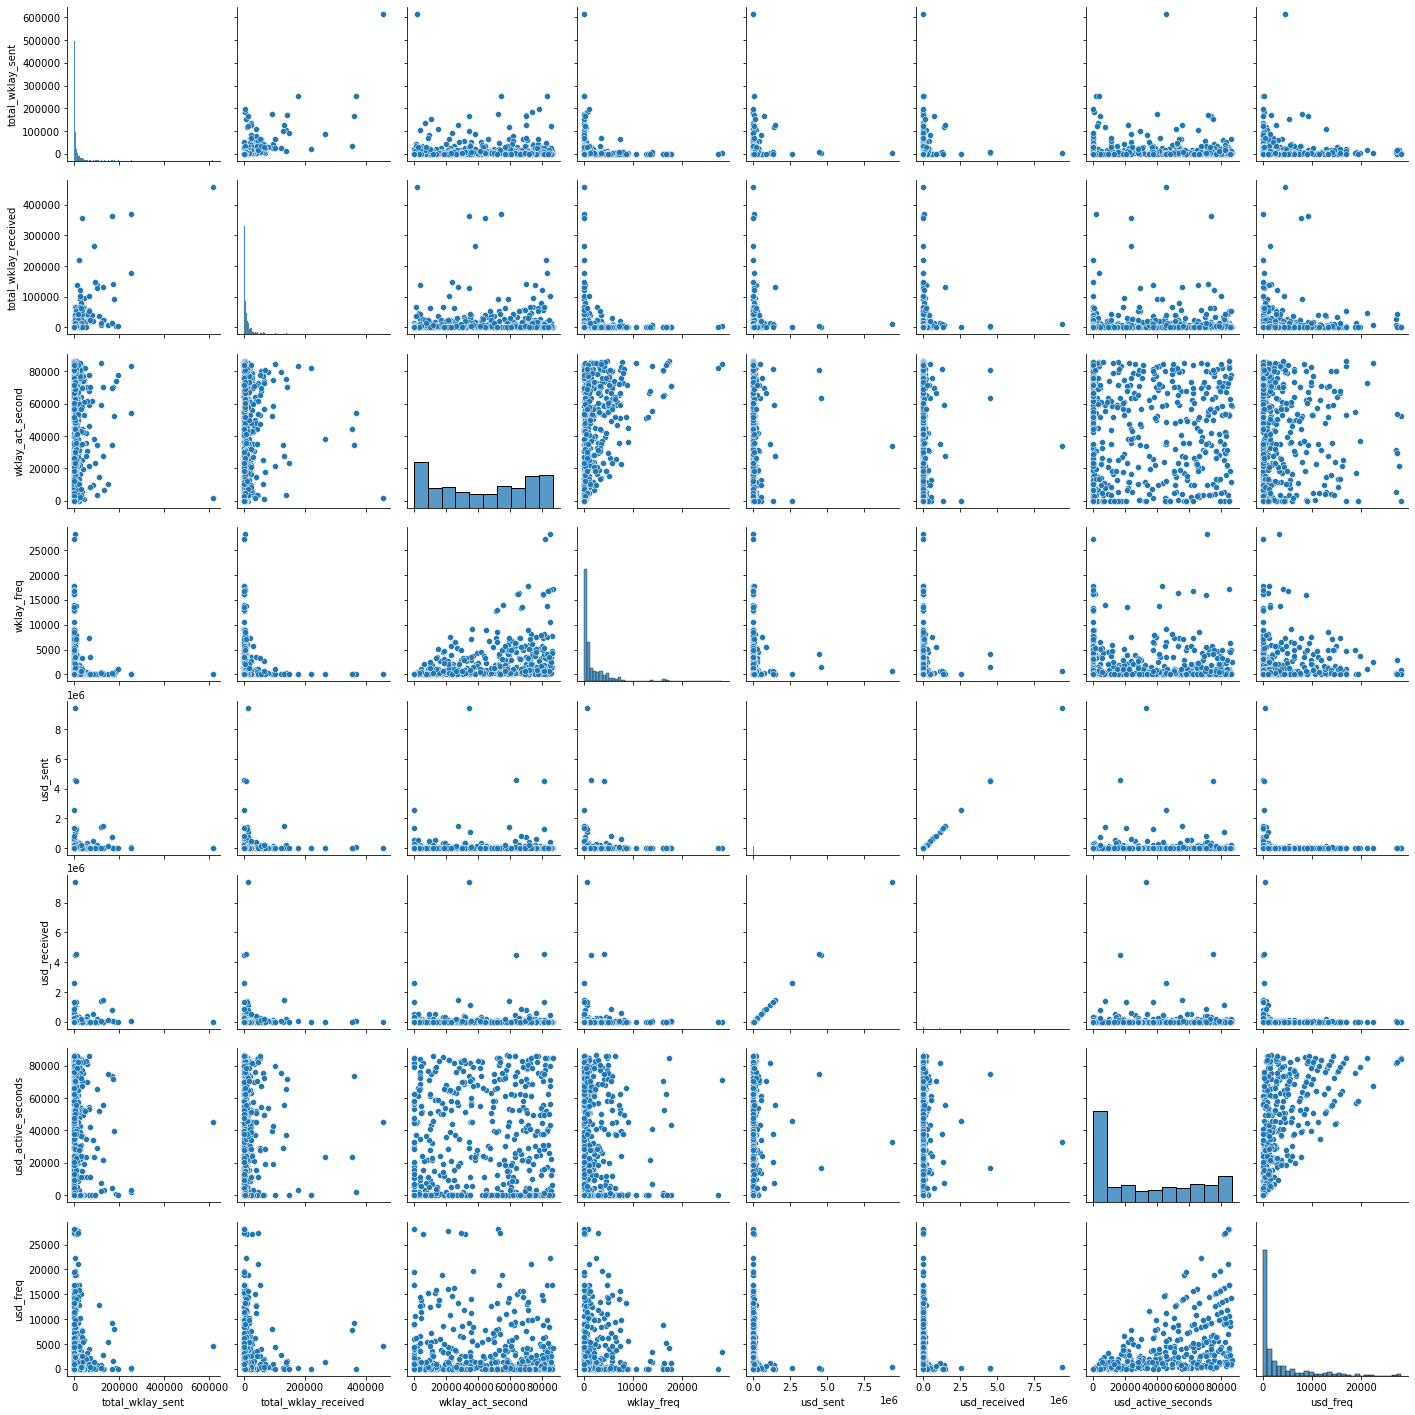

In [19]:
sns.pairplot(klaytn_inner)

# Start with cluster

In [20]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
dataset = klaytn_inner.drop(columns = ['wallet_address'])
dataset.dtypes

total_wklay_sent        float64
total_wklay_received    float64
wklay_act_second          int64
wklay_freq              float64
usd_sent                float64
usd_received            float64
usd_active_seconds        int64
usd_freq                float64
dtype: object

In [22]:
# from sklearn.preprocessing import StandardScaler
SS_scaler = preprocessing.StandardScaler()
dataset1_standardized = SS_scaler.fit_transform(dataset)
dataset1_standardized = pd.DataFrame(dataset1_standardized)
dataset1_standardized.head()

,0,1,2,3,4,5,6,7
0,14.589835,10.262857,-1.386548,-0.596805,-0.157068,-0.157024,0.447656,0.251628
1,2.286121,0.502431,-0.937888,-0.582695,-0.157174,-0.157130,0.653146,1.831356
2,2.880128,0.144290,-1.211698,-0.594239,-0.156441,-0.156397,-0.925273,-0.592923
3,-0.273661,-0.201628,0.256619,-0.357226,-0.156670,-0.156626,0.254374,-0.072527
4,-0.268178,-0.369452,-1.447151,-0.596926,-0.142575,-0.142534,-1.030720,-0.603438


In [23]:
#Min-Max Scaler
MM_scaler = preprocessing.MinMaxScaler()
dataset1_minmaxscaled = MM_scaler.fit_transform(dataset)
dataset1_minmaxscaled = pd.DataFrame(dataset1_minmaxscaled)
dataset1_minmaxscaled.head()

,0,1,2,3,4,5,6,7
0,1.000000,1.000000,0.020467,0.000015,0.000011,0.000011,0.525773,0.161120
1,0.177223,0.082433,0.171994,0.001807,0.000004,0.000004,0.598854,0.458787
2,0.216946,0.048765,0.079520,0.000341,0.000046,0.000046,0.037501,0.001981
3,0.006045,0.016245,0.575416,0.030428,0.000033,0.000033,0.457034,0.100039
4,0.006412,0.000468,0.000000,0.000000,0.000838,0.000838,0.000000,0.000000


# K-means clusters

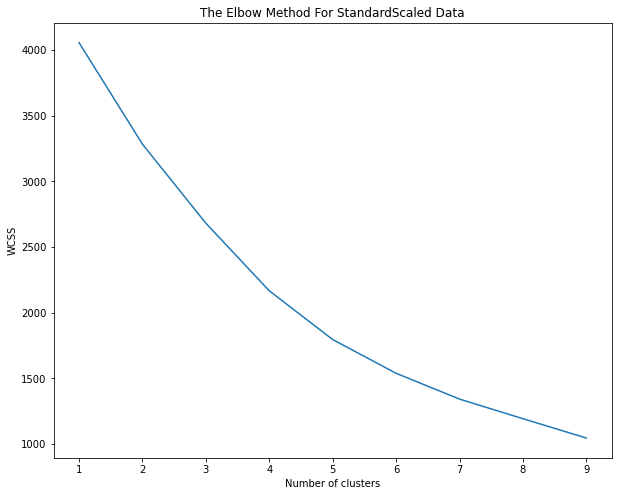

In [24]:
# find the appropriate cluster number for Standardized dataset
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 42, n_init = 10)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method For StandardScaled Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #Within-cluster sums of squares
plt.show()

Note on how no clear elbow can be seen in the above chart

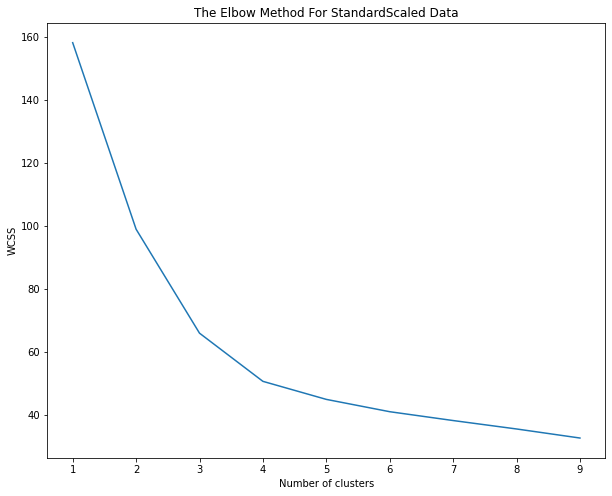

In [25]:
# find the appropriate cluster number for MinMaxScaled dataset
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 42, n_init = 10)
    kmeans.fit(dataset1_minmaxscaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method For StandardScaled Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #Within-cluster sums of squares
plt.show()

Number of clusters = 4 seems appropriate

In [26]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset1_minmaxscaled)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
dataset1_minmaxscaled['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataset1_minmaxscaled.groupby('cluster').mean(),1))
kmeans_mean_cluster

,0,1,2,3,4,5,6,7
cluster,,,,,,,,
1,0.0,0.0,0.8,0.1,0.0,0.0,0.1,0.0
2,0.0,0.0,0.2,0.0,0.0,0.0,0.8,0.3
3,0.0,0.0,0.8,0.1,0.0,0.0,0.7,0.2
4,0.0,0.0,0.2,0.0,0.0,0.0,0.1,0.0


In [27]:
dataset1_minmaxscaled['cluster'].value_counts()

1    153
4    143
3    108
2    103
Name: cluster, dtype: int64

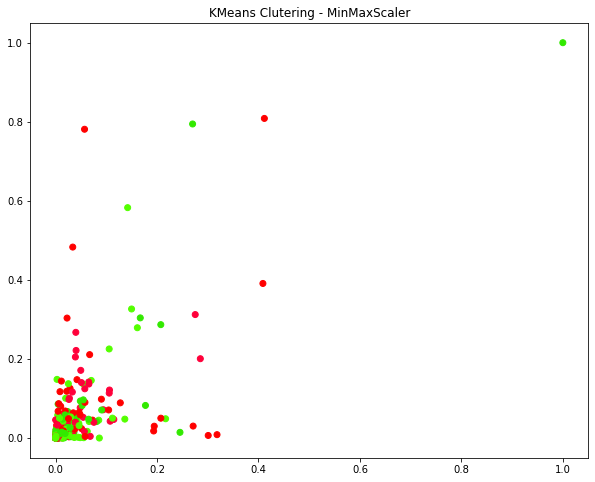

In [28]:
plt.figure(figsize=(10, 8))
plt.scatter(dataset1_minmaxscaled.iloc[:,0], dataset1_minmaxscaled.iloc[:,1],c=cluster, cmap='prism')  # plot points with cluster dependent colors
plt.title('KMeans Clutering - MinMaxScaler')
plt.show()

# Hierarchical clustering

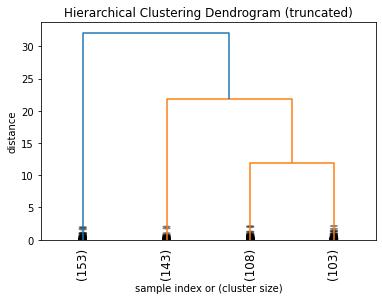

In [29]:
# Hierarchical clustering for the same dataset
# creating a dataset for hierarchical clustering
dataset2 = dataset1_minmaxscaled

# some setting for this notebook to actually show the graphs inline

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
#creating the linkage matrix
H_cluster = linkage(dataset2,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

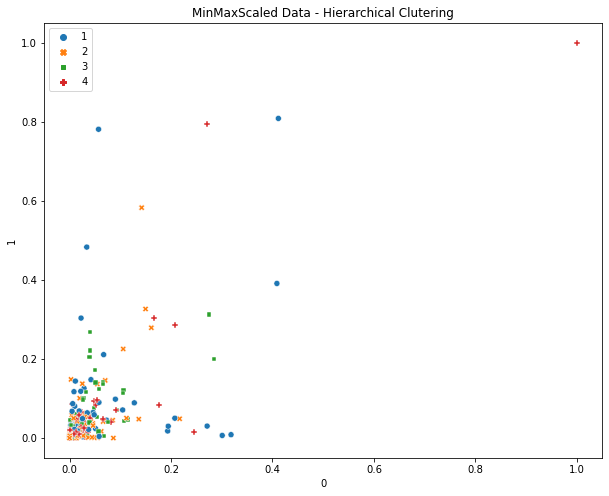

In [30]:
# Assigning the clusters and plotting the observations as per hierarchical clustering
from scipy.cluster.hierarchy import fcluster
k=4
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
cluster_2[0:100:,] #Sample fo 100 data points

plt.figure(figsize=(10, 8))
sns.scatterplot(data = dataset2, x = dataset2.iloc[:,0], y = dataset2.iloc[:,1], hue=cluster_2, style = cluster_2, palette="tab10")
plt.legend(loc="upper left")
# plot points with cluster dependent colors
plt.title('MinMaxScaled Data - Hierarchical Clutering')
plt.show()

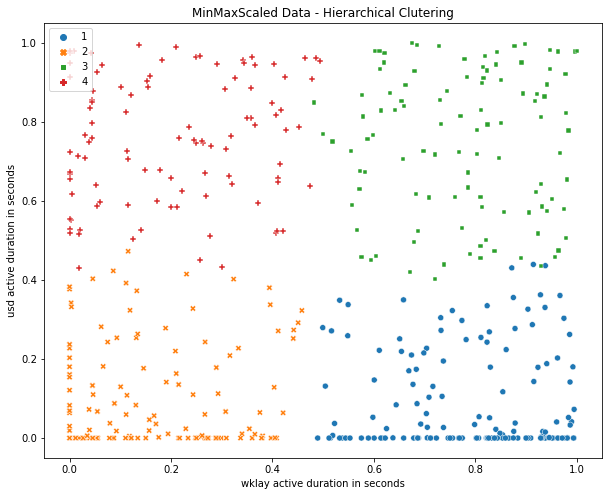

In [31]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = dataset2, x = dataset2.iloc[:,2], y = dataset2.iloc[:,6], hue=cluster_2, style = cluster_2, palette="tab10")
plt.legend(loc="upper left")
# plot points with cluster dependent colors
plt.title('MinMaxScaled Data - Hierarchical Clutering')
plt.xlabel('wklay active duration in seconds')
plt.ylabel ('usd active duration in seconds')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

In [49]:
dataset2.head()

,0,1,2,3,4,5,6,7,cluster
0,1.000000,1.000000,0.020467,0.000015,0.000011,0.000011,0.525773,0.161120,2
1,0.177223,0.082433,0.171994,0.001807,0.000004,0.000004,0.598854,0.458787,2
2,0.216946,0.048765,0.079520,0.000341,0.000046,0.000046,0.037501,0.001981,4
3,0.006045,0.016245,0.575416,0.030428,0.000033,0.000033,0.457034,0.100039,3
4,0.006412,0.000468,0.000000,0.000000,0.000838,0.000838,0.000000,0.000000,4


In [32]:
wallet_address = pd.read_csv('wallet_label_bot_user.csv')
wallet_address.head()

,wallet_address,percent_tpd,percent_atd,flag
0,0xebdd16233bac81150ad0472e84b9000c727c156a,0.890827,0.000000,User
1,0x888e3b45a4af6226e60277fb361e5e8ef3099264,0.890827,0.000239,User
2,0x76a3d1667f34a56da7a6273d14c54a29de2a4f55,0.890827,0.000478,User
3,0x64c736aaeac9f13412b7ab913a0679e97954c073,0.890827,0.000717,User
4,0x8a3ba7b8a3dc1dcf0290aaec6a1d04d9122b76de,0.890827,0.000717,User


In [33]:
address_merge_klaytn_outer = klaytn_outer.merge(wallet_address, how = 'inner', on = 'wallet_address')
address_merge_klaytn_outer.shape

(348, 12)

In [34]:
address_merge_klaytn_outer['flag'].value_counts()

User    314
Bot      34
Name: flag, dtype: int64

In [35]:
address_usd_clean = usd_clean.merge(wallet_address, how = 'inner', on = 'wallet_address')
address_usd_clean.shape

(342, 8)

In [36]:
address_usd_clean['flag'].value_counts()

User    308
Bot      34
Name: flag, dtype: int64

In [37]:
address_usd_clean.head()

,wallet_address,usd_sent,usd_received,usd_active_seconds,usd_freq,percent_tpd,percent_atd,flag
0,0xf50782a24afcb26acb85d086cf892bfffb5731b5,308744635.0,308745060.0,69663,0.262127,1.000000,0.011945,Bot
1,0x6393e943ebef0efee0ac92e2d441d562fa6345a4,459511.0,459511.0,66247,0.840698,0.952222,0.069756,User
2,0x2578189e9e1ba7cfd6916aa6eb874972f7db29b9,373.0,373.0,35095,307.850877,0.978978,0.043239,Bot
3,0xdb2050434a0e5a62ce27c27b74cb25ec754673c9,22177.0,22177.0,80952,1527.396226,0.831820,0.168180,User
4,0x2d838b26de6a927744174ab17222b80cb1c4f893,1089214.0,1080770.0,12310,9.404125,0.915432,0.102246,User


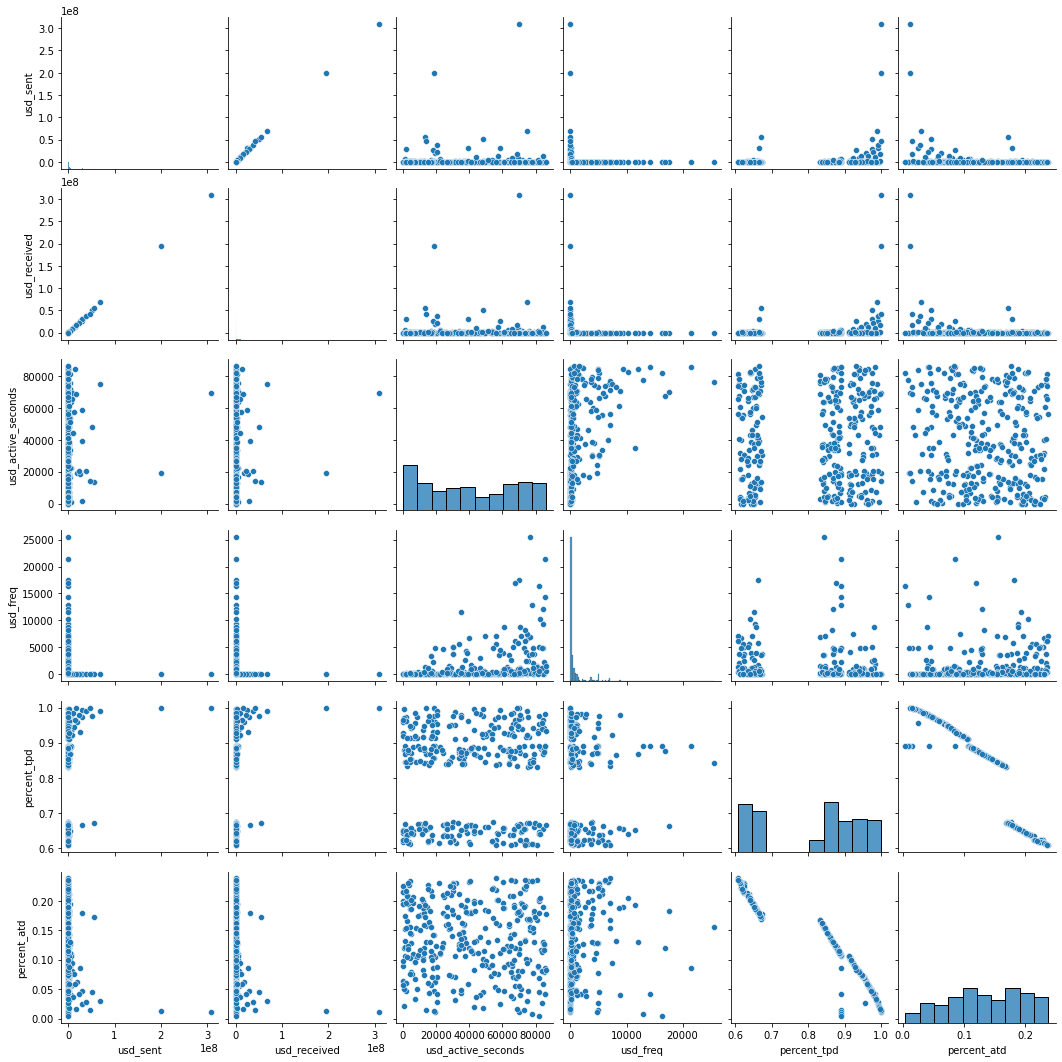

In [38]:
sns.pairplot(address_usd_clean)

<AxesSubplot:xlabel='usd_active_seconds', ylabel='percent_atd'>

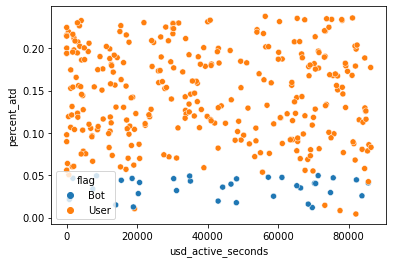

In [39]:
sns.scatterplot(data = address_usd_clean, x = 'usd_active_seconds', y ='percent_atd', hue = 'flag')

### Classification

In [40]:
address_usd_clean_2 = address_usd_clean
address_usd_clean_2['dummy_flag'] = pd.get_dummies(address_usd_clean_2['flag'], drop_first = True)
address_usd_clean_2.head()

,wallet_address,usd_sent,usd_received,usd_active_seconds,usd_freq,percent_tpd,percent_atd,flag,dummy_flag
0,0xf50782a24afcb26acb85d086cf892bfffb5731b5,308744635.0,308745060.0,69663,0.262127,1.000000,0.011945,Bot,0
1,0x6393e943ebef0efee0ac92e2d441d562fa6345a4,459511.0,459511.0,66247,0.840698,0.952222,0.069756,User,1
2,0x2578189e9e1ba7cfd6916aa6eb874972f7db29b9,373.0,373.0,35095,307.850877,0.978978,0.043239,Bot,0
3,0xdb2050434a0e5a62ce27c27b74cb25ec754673c9,22177.0,22177.0,80952,1527.396226,0.831820,0.168180,User,1
4,0x2d838b26de6a927744174ab17222b80cb1c4f893,1089214.0,1080770.0,12310,9.404125,0.915432,0.102246,User,1


In [41]:
from sklearn.model_selection import train_test_split

X = address_usd_clean_2.drop(['wallet_address','percent_tpd','percent_atd','flag','dummy_flag','usd_sent','usd_received','usd_active_seconds'], axis = 1)
y = address_usd_clean_2[['dummy_flag']]
X_train, X_test, y_train, y_test  = train_test_split(X, y, stratify = y, test_size = 0.3)

In [42]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 123)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

/Users/clara/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
print("Train score: ", log_reg.score(X_train, y_train))
print ("Test model score: ",log_reg.score(X_test, y_test))

Train score:  0.899581589958159
Test model score:  0.9029126213592233


### Scaled data using min-max scalers

In [44]:
MM_scaler = preprocessing.MinMaxScaler()
X_scaled = MM_scaler.fit_transform(X)
y_scaled = y

In [45]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y_scaled, stratify = y_scaled, test_size = 0.3)

In [46]:
log_reg_2 = LogisticRegression(random_state = 100)
log_reg_2.fit(X_scaled_train, y_scaled_train)
y_pred = log_reg_2.predict(X_scaled_test)
print("Train score: ", log_reg_2.score(X_scaled_train, y_scaled_train))
print ("Test model score: ",log_reg_2.score(X_scaled_test, y_scaled_test))

Train score:  0.899581589958159
Test model score:  0.9029126213592233


/Users/clara/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
# get importance
importance = log_reg_2.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
     print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.45112


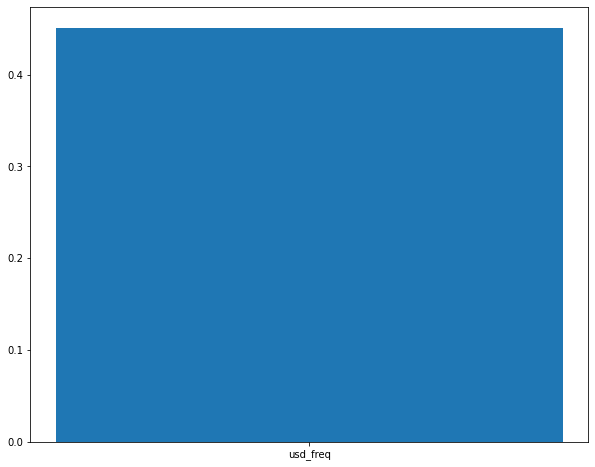

In [48]:
# get feature name
feature = np.array(X.columns)
feature_importances = pd.DataFrame(list(zip(feature,importance)), columns = ['feature','importances'])
# plot feature importance
plt.figure(figsize=(10, 8))
plt.bar(feature_importances['feature'], feature_importances['importances'])
plt.show()

### **Conclusion: after dropping 'percent_tpd','percent_atd' the model still can detect bot with R2 of around 0.9. Factor with higest coef is usd_freq. Therefore, it is safe to say that the frequency is the key factor to filter out bot.**